In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots in this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server.

In [14]:
# Type ?load_data to explore all options

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2030, 
                   years.hist = 1980:1990,
                   path.to.obs = NULL, domain = "AFR-22", aggr.m="sum")


ℹ Accessing inventory

✔ Accessing inventory [1.2s]



ℹ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…

✔ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…



ℹ Downloaded 71.56 MB

ℹ Binding members and checking temporal consistency

✔ Binding members and checking temporal consistency [3.5s]



ℹ Precipitation has been converted into mm/day



## 2nd step: climate_change_signal
Climate change signal is one of the function available in step 2 of the CAVAanalytics framework. There are several arguments in this function but mainly it allows user to look at the relative changes in the future compared to baseline. The baseline is defiend based on years.hist

In [15]:
# this funciton does several things in the background. 
# It is possible to calculate agroclimatic indicators, always relative to the baseline period by specifying lowert and uppert
# Type ?climate_change_signal to explore more options

ccs <- climate_change_signal(data=exmp1,season = 1:12)


ℹ  climate change signal, season 1-2-3-4-5-6-7-8-9-10-11-12. Climate change signal for total pr

ℹ Performing calculations

✔ Performing calculations [6.9s]





## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way

ℹ  Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]



ℹ  Visualizing individual members, argument stat is ignored

ℹ Plotting

✔ Plotting s]





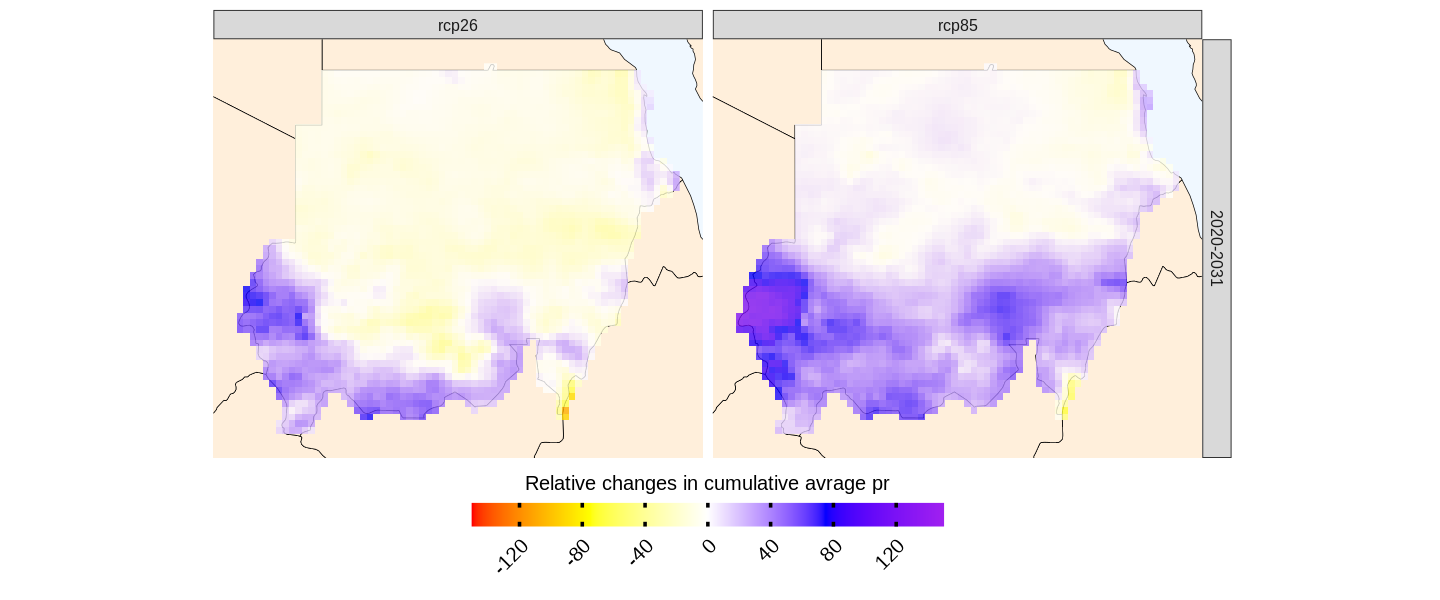

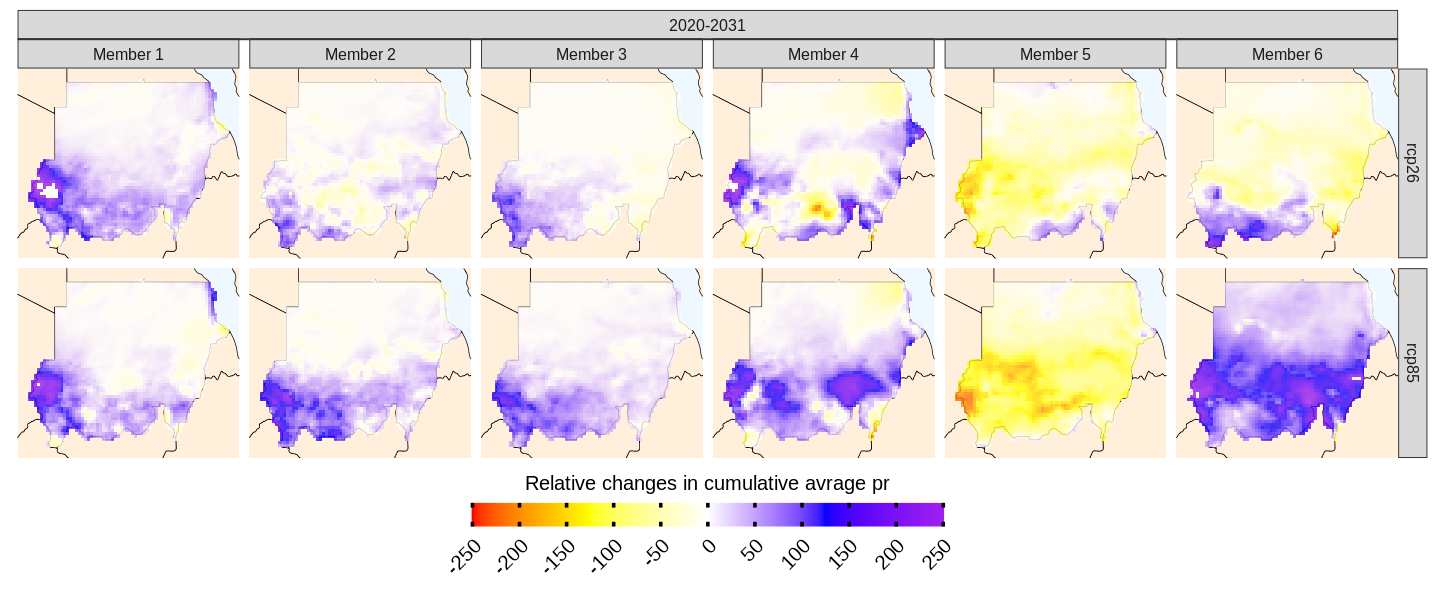

In [21]:
options(repr.plot.width=12, repr.plot.height=5)

# specify color palette with palette and whether visualizing the results for the ensemble or not with ensemble
plotting(ccs , ensemble = TRUE, palette = c("red","yellow", "white", "blue", "purple"), legend_range =c(-150, 150),
         plot_titles = "Relative changes in cumulative avrage pr",alpha = 0.8)


# specify color palette with palette
plotting(ccs , ensemble = FALSE, palette = c("red","yellow", "white", "blue", "purple"),
         plot_titles = "Relative changes in cumulative avrage pr", alpha = 0.8, 
         legend_range=c(-250, 250))

## What happen if we want to perform a calculation on a large area?
The above functions are quite memory intensive. This of course depends on how many years of data you are loading but also on the size of the region. If you are using your normal laptop, it is likely that you have available only 16Gb RAM. Even the above operations could potentially fail. You can monitor your RAM usage using htop or bashtop in linux OS.

To solve this issue, we combined the load_data step with the 2nd step so that the loading and calculations are performed sequentially on small chunks of spatial data. At the end of the process, the small rasters are merged together. Because the operations is performed sequentially, while slow, it saves memory allowing users to analyse entire CORDEX domains

In [23]:
# as you can see, this takes some time to run. However, the amount of data retrieved is very big and 
# this function, despite being slow, allow users to process a lot of data even locally. 
# In this case, 
# To run this locally, consider lowering chunk_size to 5 or 2. Also, to make the process less intensive you could use agg.m="sum" to load
# monthly aggregated data instead of daily data

exmp1_chunk <-  load_data_and_projections(variable = "tasmax", years.hist = 1980:1982,
                                  years.proj = 2020:2023, path.to.data = "CORDEX-CORE",
                                  path.to.obs = NULL, xlim = c(0,50), ylim = c(0,20), aggr.m="mean",
                                  chunk.size = 5, season = 1:12, domain="AFR-22")

✔ Loading and processing spatial CHUNK_1_1 . Coordinates  xlim= -0.25,5  ylim= -0.25,5

✔ Loading and processing spatial CHUNK_1_2 . Coordinates  xlim= -0.25,5  ylim= 4.75,10

✔ Loading and processing spatial CHUNK_1_3 . Coordinates  xlim= -0.25,5  ylim= 9.75,15

✔ Loading and processing spatial CHUNK_1_4 . Coordinates  xlim= -0.25,5  ylim= 14.75,20

✔ Loading and processing spatial CHUNK_2_1 . Coordinates  xlim= 4.75,10  ylim= -0.25,5

✔ Loading and processing spatial CHUNK_2_2 . Coordinates  xlim= 4.75,10  ylim= 4.75,10

✔ Loading and processing spatial CHUNK_2_3 . Coordinates  xlim= 4.75,10  ylim= 9.75,15

✔ Loading and processing spatial CHUNK_2_4 . Coordinates  xlim= 4.75,10  ylim= 14.75,20

✔ Loading and processing spatial CHUNK_3_1 . Coordinates  xlim= 9.75,15  ylim= -0.25,5

✔ Loading and processing spatial CHUNK_3_2 . Coordinates  xlim= 9.75,15  ylim= 4.75,10

✔ Loading and processing spatial CHUNK_3_3 . Coordinates  xlim= 9.75,15  ylim= 9.75,15

✔ Loading and processing spati

ℹ Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]





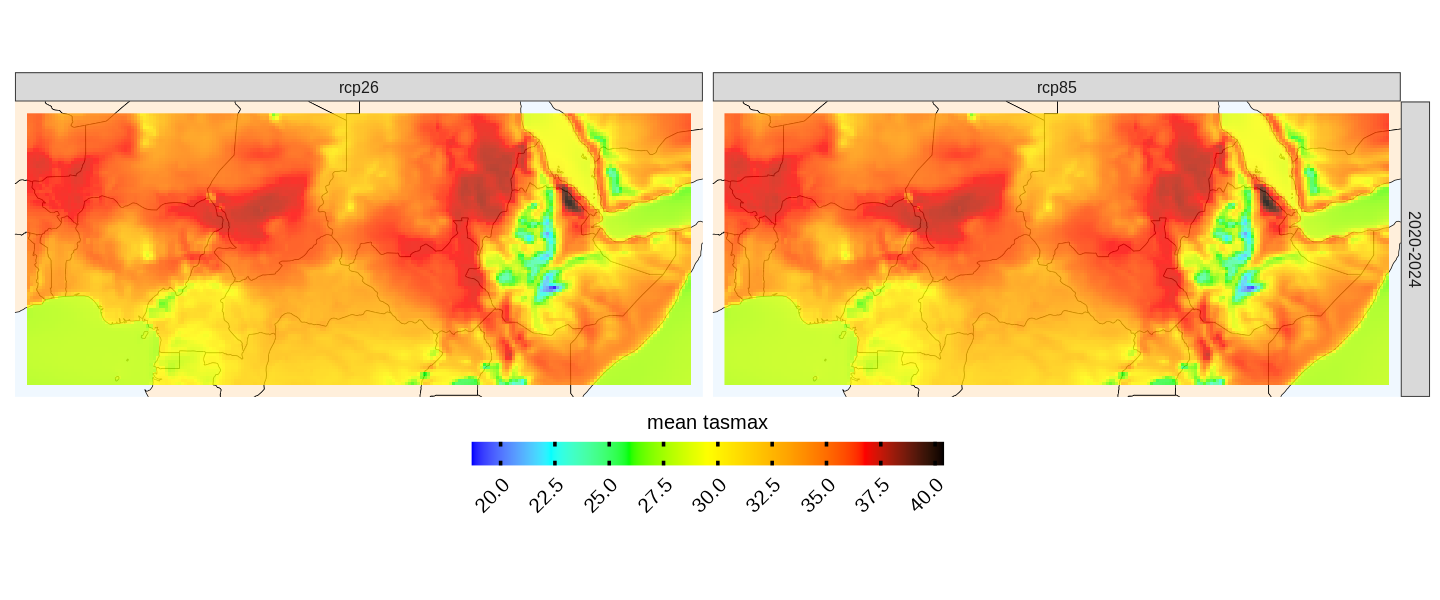

In [25]:
plotting(exmp1_chunk, ensemble=T, plot_titles = "mean tasmax", alpha=0.8)